In [ ]:
#The main aim of this project is to identify hate text words or speech in tweets. Provided a training data of tweets and labels
# Given Label '1' indicates the tweets is whether racist or sexist while label '0' indicates the tweet is not racist or sexist 
# The main goal of this project is to predict lablels on a test dataset

In [19]:
#Importing the libraraies
import string
import nltk
import warnings
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import re

In [6]:
# Laading the data
traindata = pd.read_csv('train.csv',encoding='ISO-8859-1')

In [7]:
testdata = pd.read_csv('test.csv',encoding='ISO-8859-1')

In [8]:
traindata.head()

,ItemID,Sentiment,SentimentText
0,1,0,is so sad for my APL frie...
1,2,0,I missed the New Moon trail...
2,3,1,omg its already 7:30 :O
3,4,0,.. Omgaga. Im sooo im gunna CRy. I'...
4,5,0,i think mi bf is cheating on me!!! ...


In [10]:
traindata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99989 entries, 0 to 99988
Data columns (total 3 columns):
ItemID           99989 non-null int64
Sentiment        99989 non-null int64
SentimentText    99989 non-null object
dtypes: int64(2), object(1)
memory usage: 2.3+ MB


In [11]:
# Count of how many tweets are '0' and '1'
traindata['Sentiment'].value_counts()

1    56457
0    43532
Name: Sentiment, dtype: int64

In [12]:
#Integrating both the datasets
merge = traindata.append(testdata,ignore_index = True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:6692: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


In [15]:
merge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 399978 entries, 0 to 399977
Data columns (total 3 columns):
ItemID           399978 non-null int64
Sentiment        99989 non-null float64
SentimentText    399978 non-null object
dtypes: float64(1), int64(1), object(1)
memory usage: 9.2+ MB


In [16]:
merge.head()

,ItemID,Sentiment,SentimentText
0,1,0.0,is so sad for my APL frie...
1,2,0.0,I missed the New Moon trail...
2,3,1.0,omg its already 7:30 :O
3,4,0.0,.. Omgaga. Im sooo im gunna CRy. I'...
4,5,0.0,i think mi bf is cheating on me!!! ...


In [17]:
## Cleaning the text by removing hyperlinks and special characters
def clean_tweet(txt, twt):
    a = re.findall(twt, txt)
    for i in a:
        txt = re.sub(i, '', txt)
        
    return txt

In [20]:
#Eliminating elimnating elements like twitter handles
merge['SentimentText'] = np.vectorize(clean_tweet)(merge['SentimentText'], "@[\w]*")

In [21]:
#Eliminating elements like characters, numbers and punctuations
merge['SentimentText'] = merge['SentimentText'].str.replace("[^a-zA-Z#]", " ")

In [24]:
#Eliminating short words       
merge['SentimentText'] = merge['SentimentText'].apply(lambda y: ' '.join([y for y in x.split() if len(y)>3]))  

NameError: name 'x' is not defined

In [26]:
#By implementing tokenization we decompose the sequence of strings into words, keywords, phrases, symbols and other elements called tokens. 
tweettoken = merge['SentimentText'].apply(lambda x: x.split())

In [27]:
#Implementing the stemming process
from nltk.stem.porter import*

In [29]:
stemi = PorterStemmer()

In [30]:
tweettoken = tweettoken.apply(lambda x: [stemi.stem(i) for i in x]) 

In [31]:
#Mending the tokens
for i in range(len(tweettoken)):
    tweettoken[i] = ' '.join(tweettoken[i])

merge['SentimentText'] = tweettoken

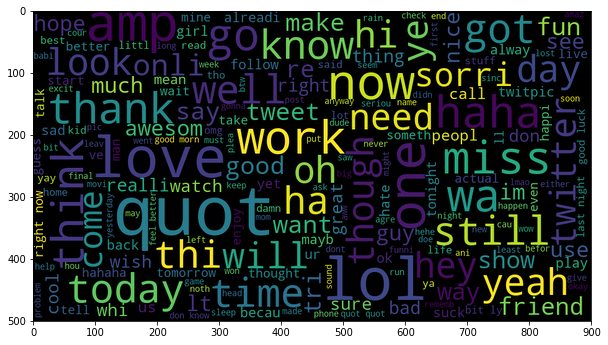

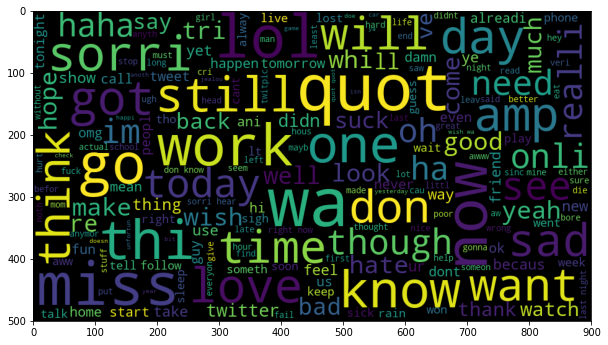

In [34]:
#Data visualization process
#Implementing the Wordcloud 
words = ' '.join([text for text in merge['SentimentText']])
from wordcloud import WordCloud
wordcloud = WordCloud(width=900, height=500, random_state=21, max_font_size=110).generate(words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="lanczos")

#Words in non racist/sexist tweets
wordsNormal =' '.join([text for text in merge['SentimentText'][merge['Sentiment'] == 0]])

wordcloud = WordCloud(width=900, height=500, random_state=21, max_font_size=110).generate(wordsNormal)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="hermite")

In [35]:

#Implementing Bag-of-Words Features
#Bag-of-Words features are easily implemeted using sklearn’s CountVectorizer function. 
from sklearn.feature_extraction.text import CountVectorizer
bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
# bag-of-words feature matrix
bow = bow_vectorizer.fit_transform(merge['SentimentText'])


In [37]:
#TF-IDF Features
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
# TF-IDF feature matrix
tfidf = tfidf_vectorizer.fit_transform(merge['SentimentText'])